In [2]:
import seaborn as sb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import scipy.stats as st
sb.set()

import matplotlib as mpl
sb.set(rc = {'figure.figsize':(15,8)})
mpl.rcParams['figure.dpi'] = 300

In [5]:
#defining constants
PD=0.03 #probability of default
LGD = 0.5 #loss given default
N=1000 #portfolio size

### 1(a) VaR Calculation

In [6]:
VaR_99 = 0.5*st.binom.ppf(0.99,N,0.03)

The 99% VaR and the Economic Captial(the 99% VaR less the expected loss) required given this loss model is 21.5 and 6.5, respectively

## 2(c)
### Binomial Loss Model

In [4]:
# """I discovered the binomial function after after I coded the loss function. I'll keep the original just because I think
# its cool and is a testament to my greatness"""

# #function to compute losses
# def loss():
#     I=np.where(np.random.rand(1000)<=PD,1,0) #generates uniform randoms and assigns 1 to randoms satisfying condition
#     D=I[I==1] #creates array of default indicators from I. Might be useful later
#     DR= len(D)/N #calculates default rate. Might be useful later
#     return np.sum(D) #sums default rates

# MC_L=(LGD)*np.array([loss() for i in np.arange(1,10001)]) #creates array of losses

# def binomial_loss(Z): #original loss function for mixture. This took 12 minutes to run. The new function takes about a second
#     P_z=[0.02*i+0.04*(1-i) for i in Z]
#     LGD_z=[0.4*i+0.6*(1-i) for i in Z]
#     return np.sum([j*st.binom.rvs(1,i) for (i,j) in zip(P_z,LGD_z)]),np.sum([st.binom.rvs(1,i) for (i,j) in zip(P_z,LGD_z)])

### (c) 
#### i) Histograms and Statistics

In [28]:
"""This function originally took 12min to run 10000 times, but the new function only takes 1.7. 
This was acheived by replacing all list comprehensions with np.array and their corresponding logic functions"""
#binomial mixture model

# def binomial_loss():
#     Z=np.random.uniform(0,1,1000)
#     P_z=[0.01*i+0.08*(1-i) for i in Z]
#     LGD_z=[1*i+1*(1-i) for i in Z]
#     Ind=[st.binom.rvs(1,i) for i in P_z]
#     loss=np.multiply(LGD_z,Ind)
#     return np.sum(loss),Ind

def binomial_loss():
    Z=st.binom.rvs(1,0.5,size=1000)
    P_z=0.02*Z+0.04*(1-Z)
    LGD_z=0.4*Z+0.6*(1-Z)
    Ind=st.binom.rvs(1,P_z)
    Loss=np.multiply(LGD_z,Ind)
    return np.sum(Ind),np.sum(Loss)

In [12]:
Z=st.binom.rvs(1,0.5,size=1000)
P_z=0.02*Z+0.04*(1-Z)
LGD_z=0.4*Z+0.6*(1-Z)
display(Z[1],P_z[1],LGD_z[1])

1

0.02

0.4

In [ ]:
BiMix[0]

In [31]:
# BiMix=[binomial_loss() for i in range(10000)]
BiMix=[list(i) for i in zip(*[binomial_loss() for i in range(10000)])] #the function generates a tuple, so this splits the tuple into a seperate lists

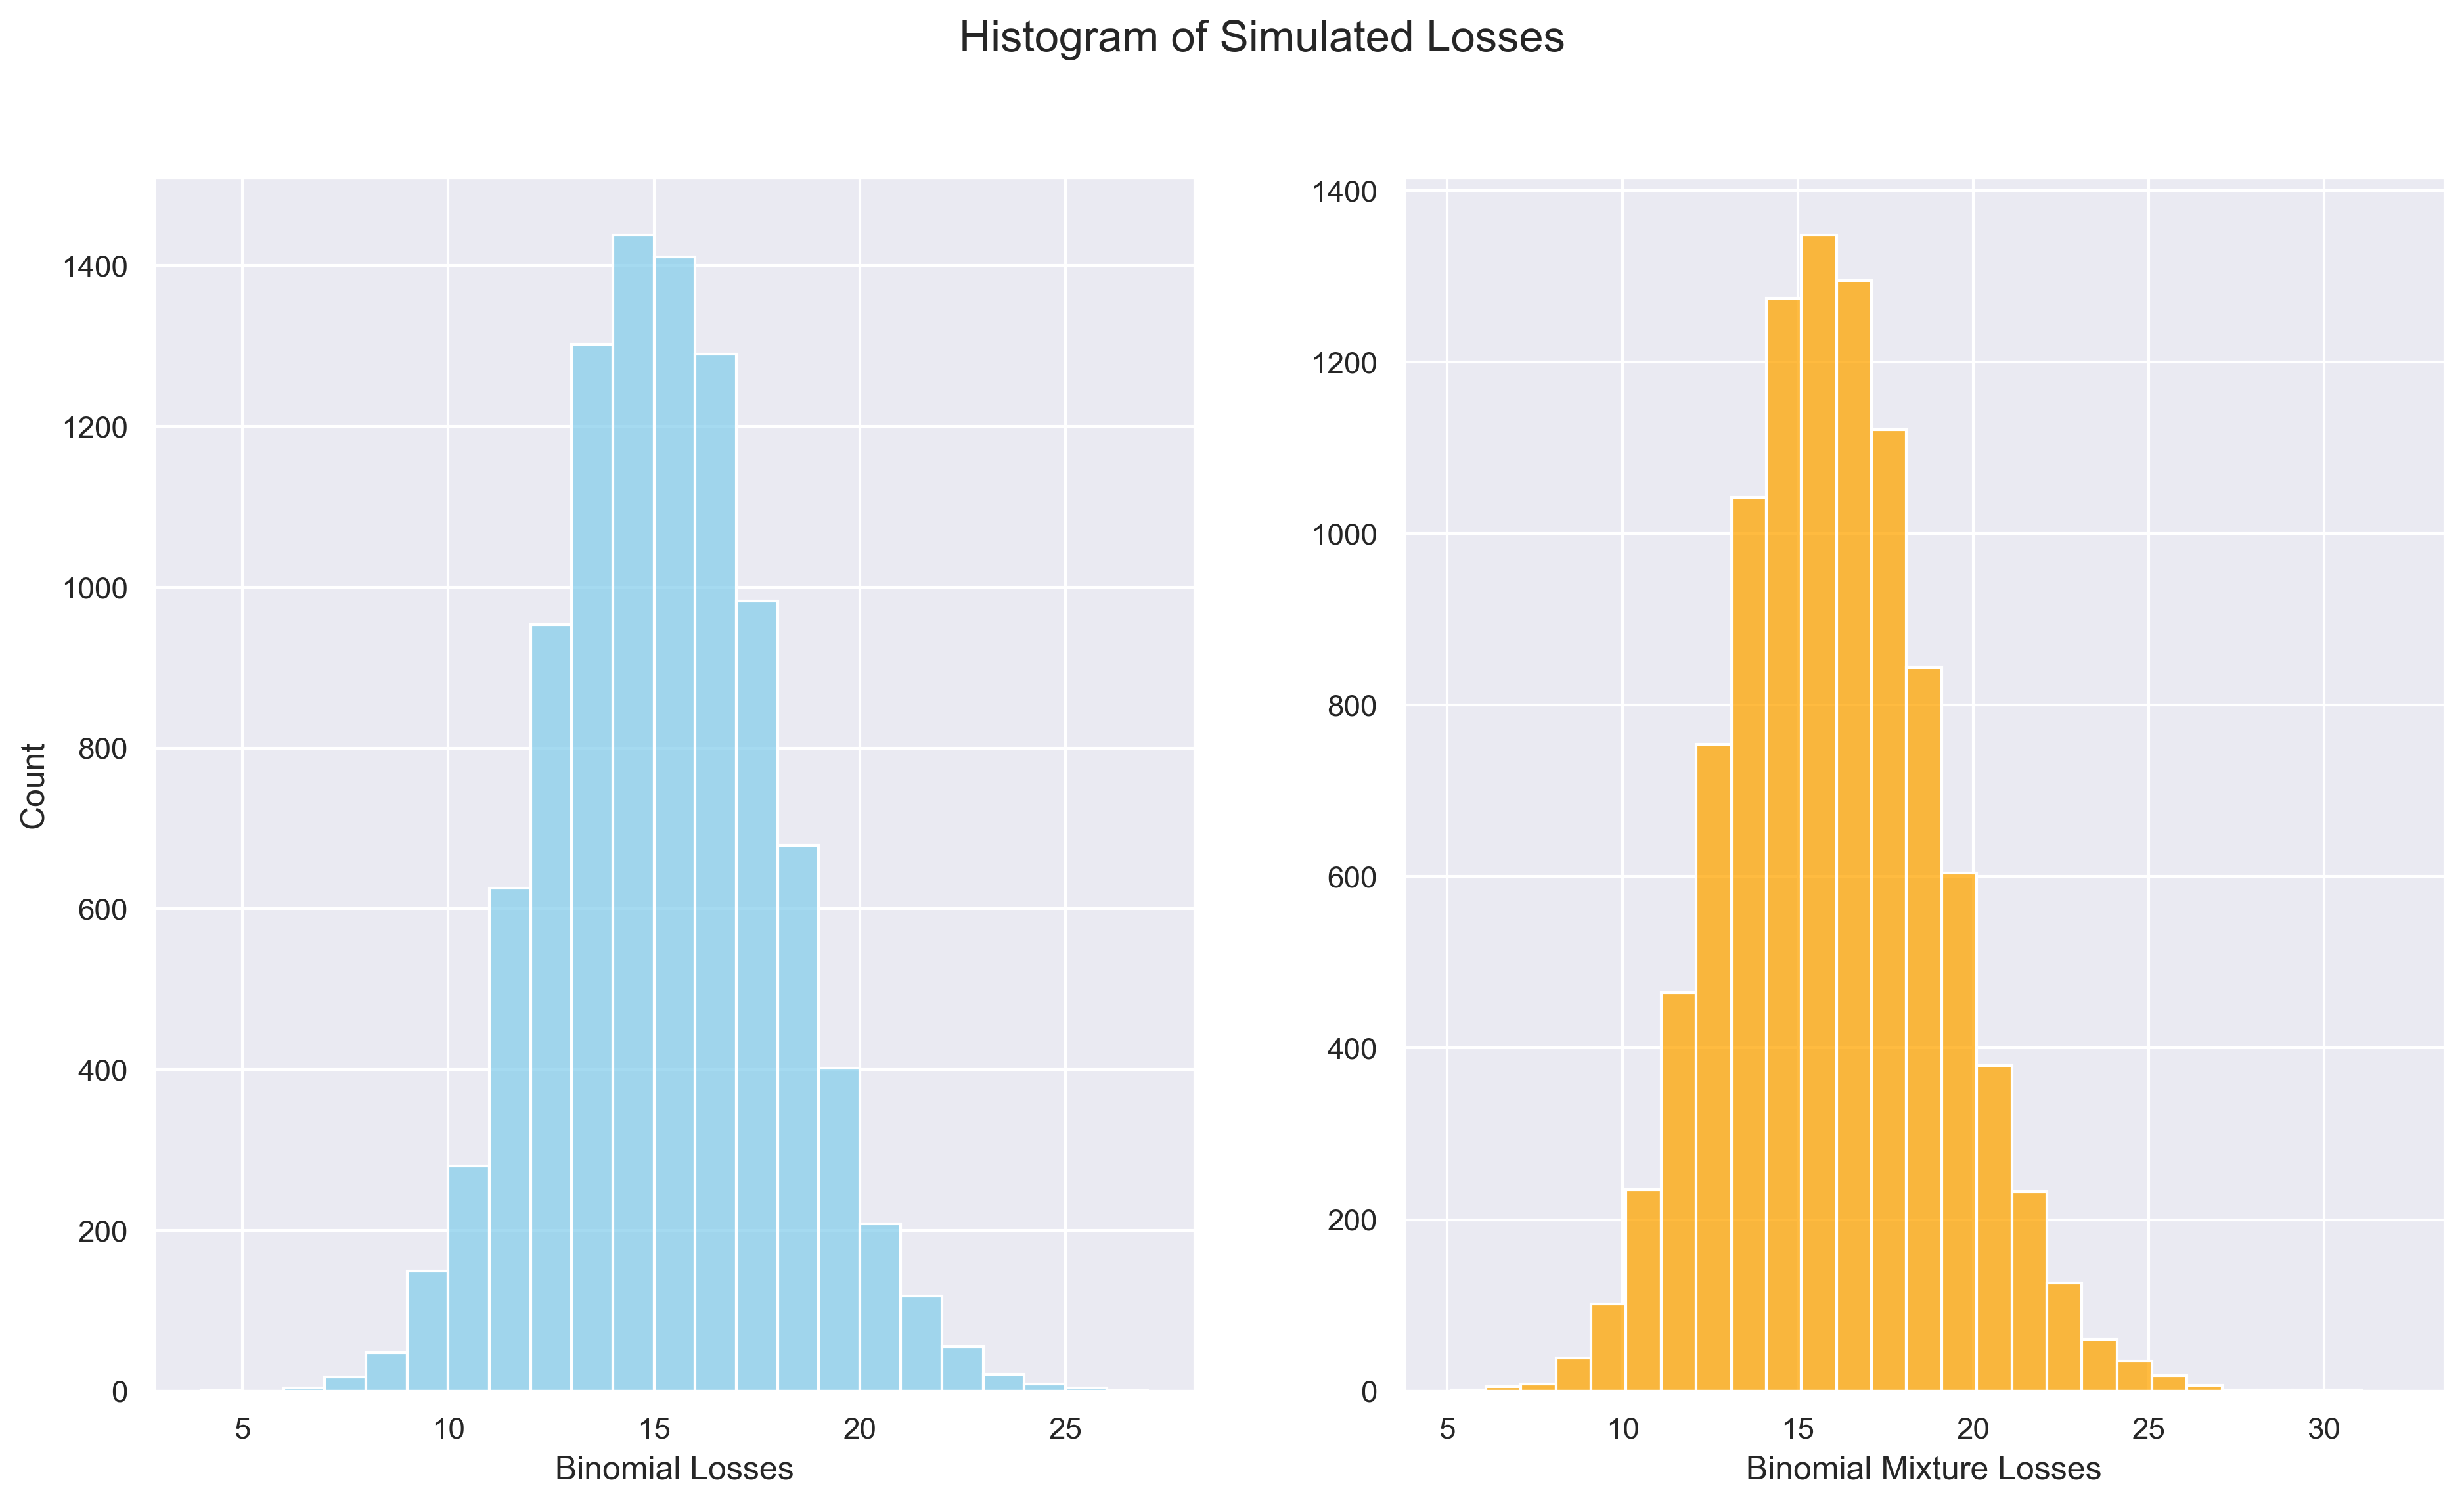

In [36]:
Portfolio=pd.DataFrame()
Portfolio['Binomial Losses']=0.5*st.binom.rvs(N,PD,size=10000) #generates loss
Portfolio['Binomial Defaults'] = Portfolio['Binomial Losses']/0.5
Portfolio['Binomial Mixture Losses']= BiMix[1]
Portfolio['Binomial Mixture Defaults'] = BiMix[0]

#plotting histograms
fig, axs = plt.subplots(1, 2)

sb.histplot(Portfolio['Binomial Losses'],discrete=True, color='skyblue',ax=axs[0]);
sb.histplot(Portfolio['Binomial Mixture Losses'],discrete=True, color= 'orange',ax=axs[1]);
fig.suptitle("Histogram of Simulated Losses", fontsize=16);
plt.ylabel('');

In [52]:
Stats=pd.DataFrame(index=['IID Loss','Binomial Mixture'])

Stats['Expected Losses']= Portfolio['Binomial Losses'].mean(),Portfolio['Binomial Mixture Losses'].mean()

Stats['Variance']= Portfolio['Binomial Losses'].var(),Portfolio['Binomial Mixture Losses'].var()

Stats['Expected Default Rate']=Portfolio['Binomial Defaults'].mean()/1000, Portfolio['Binomial Mixture Defaults'].mean()/1000

Stats['99% VaR']=(
            Portfolio.sort_values(by=['Binomial Losses']).iloc[9900]['Binomial Losses'],
            Portfolio.sort_values(by=['Binomial Mixture Losses']).iloc[9900]['Binomial Mixture Losses']
                 )
Stats['Economic Capital']= Stats['99% VaR']-Stats['Expected Losses']
Stats

,Expected Losses,Variance,Expected Default Rate,99% VaR,Economic Capital
IID Loss,15.03045,7.159814,0.030061,21.5,6.46955
Binomial Mixture,15.96888,8.777917,0.030016,23.2,7.23112


### 1(d)

The average losses computed in the binomial mixture model are higher than those in the binomial loss model. This is because the probability of default and loss given default were independent and constant in the IID Binomial model, however, in the mixture model, they are functions of the uniform random variable. This adds more variance to the distribution. Similarly, the average loss for the mixture model is lower and because economic capital is a function of the average loss, its economic capital is expected to be lower. 